# Final Project Report: Is age of a player a good predictor for total played hours?
Group 007-2 Sohan Sadeque, Io Santiago, Maggie Tu, Fangfei Zhu

### Introduction:
PLAICraft is a project run by the PLAI (Pacific Laboratory for Artificial Intelligence) group at UBC’s Computer Science Department. Through this project, participants are able to play *Minecraft* for free on their browser on a shared server world where data such as audio, key presses, mouse inputs, and video footage is collected from players to train an Artificial Intelligence model. 
Our group first chose a broad question that we wanted to answer using datasets from this project. We ended up choosing: <br>

**Which ‘kinds’ of players are most likely to contribute a large amount of data?** <br>

To answer this broad question, we had to narrow it down and make it more specific. We decided that we can use ‘total played hours’ as a metric for the amount of data contributed and that age would be an interesting variable to correlate it with. Therefore, this report will focus on answering the following specific question: <br>

**Can age predict the total played hours for participants?** <br>

To answer this question, we were provided with two datasets: ‘players.csv’ and ‘sessions.csv’. <br>
The players.csv dataset includes data on the PLAICraft players themselves, totalling 196 observations and 7 variables including: <br>
<ol>
    <li>
        experience: The player’s prior experience with *Minecraft*
    </li>
    <li>
        subscribe: Whether the player is subscribed to the PLAICraft mailing list
    </li>
    <li>
        hashedEmail: The player’s encrypted email
    </li>
    <li>
        played_hours: The player’s total hours on the PLAICraft server
    </li>
    <li>
        name: The player’s first name
    </li>
    <li>
        gender: The player’s gender
    </li>
    <li>
        Age: The player’s age
    </li>
</ol>
The second dataset, sessions.csv, includes data on PLAICraft sessions. It totals 1,535 observations, each representing an individual player’s play session on the server. The dataset includes 5 variables:
<ol>
    <li>
        hashedEmail: The player’s encrypted email
    </li>
    <li>
        start_time: The play session’s start time including date, month, year, and time in 24-hour clock format
    </li>
    <li>
        end_time: The play session’s end time including date, month, year, and time in 24-hour clock format
    </li>
    <li>
        original_start_time: The play session’s start time in a different format.
    </li>
    <li>
        original_end_time: The play session’s end time in a different format.
    </li>
</ol>
Our methods will focus on using the <b>players.csv</b> dataset to answer our question.

### Methods & Results:

#### loads data 

In [29]:
library(tidyverse)
library(repr)
library(ggplot2)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [30]:
players <- read_csv("https://raw.githubusercontent.com/maggiettu/dsci100-group-project/refs/heads/main/players.csv")
players
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

In [31]:
sessions <- read_csv("https://raw.githubusercontent.com/maggiettu/dsci100-group-project/refs/heads/main/sessions.csv")
sessions
summary(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

### Wrangling and Cleaning the Dataset

In [32]:
players_select <- players |>
        select(played_hours,Age)
players_select

played_hours,Age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
⋮,⋮
0.0,17
2.3,17
0.2,NA


In [33]:
players_clean <- players_select |>
rename(age = Age)

In [34]:
players_mean <- players_clean |>
        summarize(
            mean_played_hours = mean(played_hours),
            mean_age = mean(age, na.rm = TRUE))

players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


### Summary of the data

### Visualization of the dataset

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


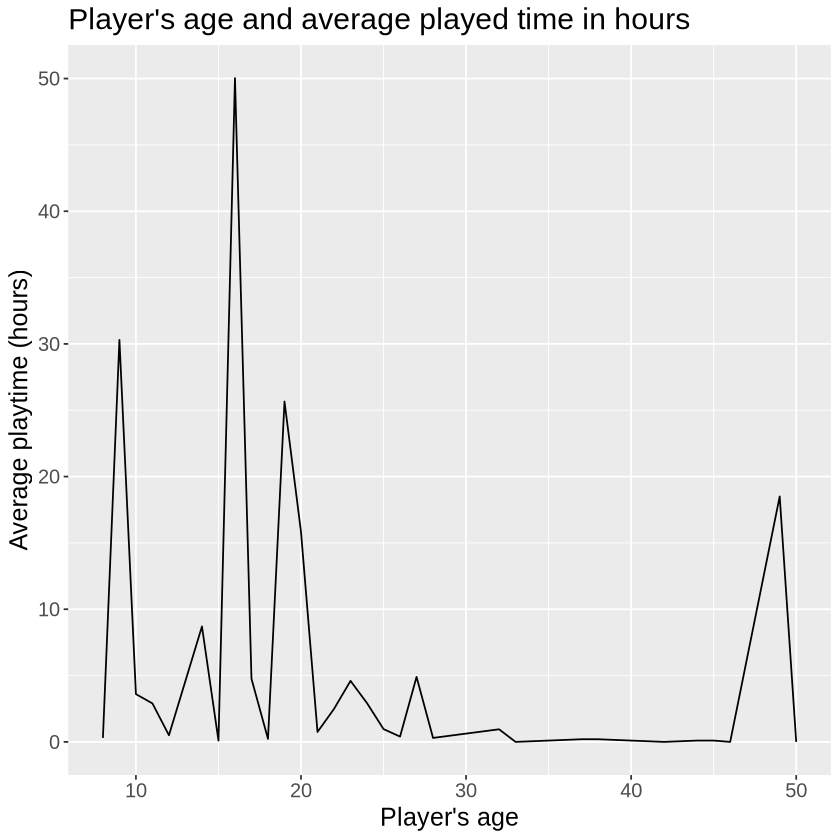

In [35]:
average_playtimes <- players_clean |>
    group_by(age) |>
    summarize(
        average_play = mean(played_hours)
    )
players_plot <- average_playtimes |>
    ggplot(aes(x = age ,y = average_play)) +
    geom_line()+
    labs(x = "Player's age",y = "Average playtime (hours)") +
    ggtitle("Player's age and average played time in hours")+
    theme(text = element_text(size = 15))
players_plot

### Data Analysis

In [36]:
players_mean <- players_clean |>
        summarize(
            mean_played_hours = mean(played_hours),
            mean_age = mean (age, na.rm = TRUE))

players_mean


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


In [37]:
## split data
players_split <- initial_split(players_clean, prop = 0.5, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

## make model
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors =  tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

## make recipe
players_recipe <- recipe(played_hours ~ age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())


In [38]:
## 5 fold 
set.seed(1234)

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)


In [39]:
## calculate rmse 
set.seed(2019)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))


players_results <- players_workflow |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics()

players_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,25.0590142,5,11.4574934,Preprocessor1_Model01
1,rsq,standard,0.1507166,5,0.1410433,Preprocessor1_Model01
2,rmse,standard,28.5424675,5,9.6990845,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,rsq,standard,0.01422165,5,0.004543090,Preprocessor1_Model09
10,rmse,standard,19.84949851,5,7.555922775,Preprocessor1_Model10
10,rsq,standard,0.01599551,5,0.004258312,Preprocessor1_Model10


In [40]:
## find best k value
players_min <- players_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)

k_min <- players_min |>
         pull(neighbors)


In [41]:
## rerun model with best k
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)


### Visualisation of analysis

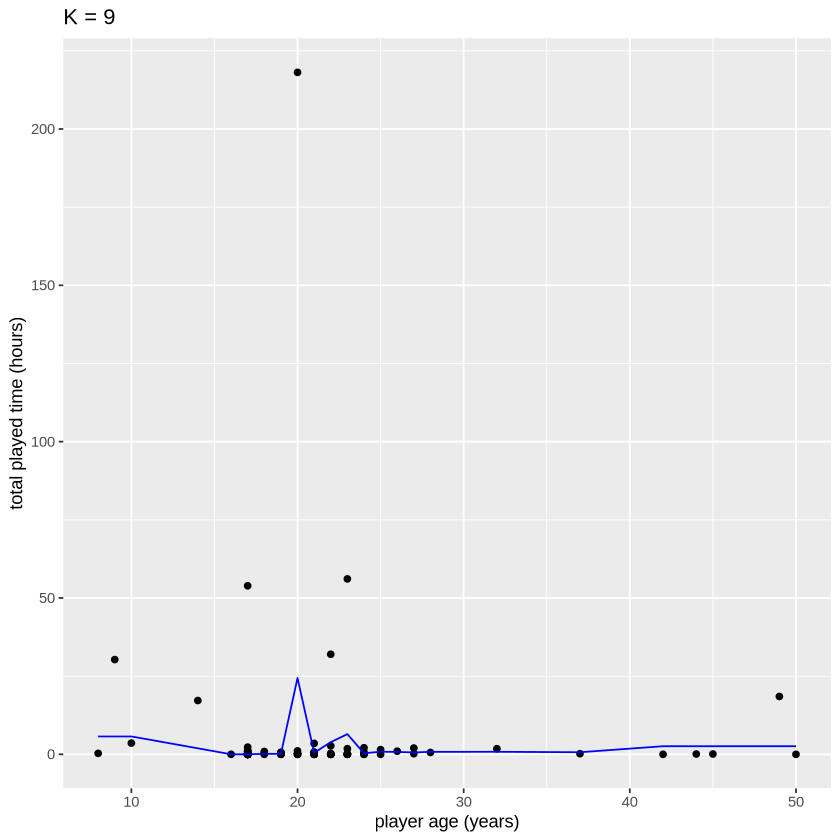

In [42]:
players_preds <- players_best_fit |>
  predict(players_training) |>
  bind_cols(players_training)

players_plot <- ggplot(players_preds, aes(x = age, y = played_hours)) +
  geom_point() +
  geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
  xlab("player age (years)") +
  ylab("total played time (hours)") +
  ggtitle(paste0("K = ", k_min))

players_plot


### Discussion:

Model not good...

### References